' Visualize train and test loss '

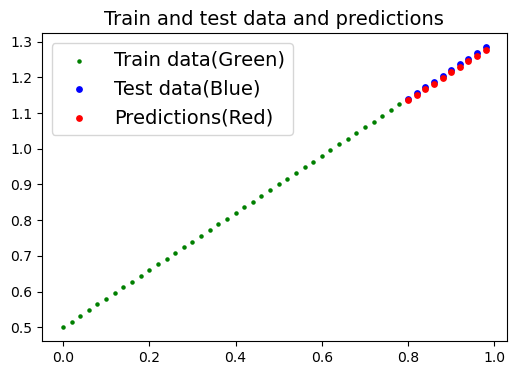

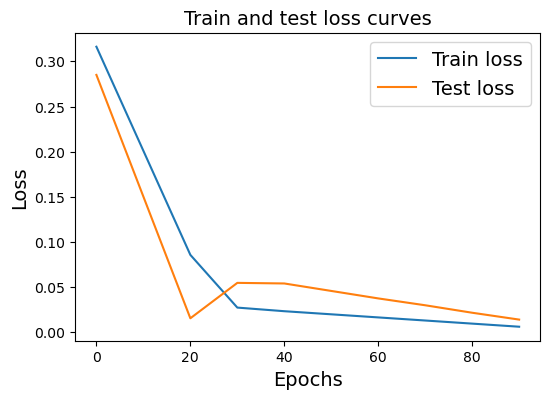

In [151]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

""" Prepare dataset """
weight = 0.8
bias = 0.5

X = torch.tensor([[0.00], [0.02], [0.04], [0.06], [0.08], # Size(50, 1)
                  [0.10], [0.12], [0.14], [0.16], [0.18],
                  [0.20], [0.22], [0.24], [0.26], [0.28],
                  [0.30], [0.32], [0.34], [0.36], [0.38],
                  [0.40], [0.42], [0.44], [0.46], [0.48],
                  [0.50], [0.52], [0.54], [0.56], [0.58],
                  [0.60], [0.62], [0.64], [0.66], [0.68],
                  [0.70], [0.72], [0.74], [0.76], [0.78],
                  [0.80], [0.82], [0.84], [0.86], [0.88],
                  [0.90], [0.92], [0.94], [0.96], [0.98]], device=device)
torch.manual_seed(42)

# ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ Uncomment it to shuffle dataset ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓
# X = list(DataLoader(dataset=X, batch_size=50, shuffle=True))[0] 

Y = weight * X + bias

l = int(0.8 * len(X))
X_train, Y_train, X_test, Y_test = X[:l], Y[:l], X[l:], Y[l:]
""" Prepare dataset """

""" Prepare model, loss function and optimizer """
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear_layer(x)

torch.manual_seed(42)

my_model = LinearRegressionModel().to(device)

# """ Load model """
# loaded_model = torch.load(f="lr_bgd_dl_0.pth",
#                           weights_only=True)
# my_model.load_state_dict(loaded_model)
# """ Load model """

loss_fn = nn.L1Loss()

optimizer = optim.SGD(params=my_model.parameters(), lr=0.01)
""" Prepare model, loss function and optimizer """

""" Train and test model """
epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    X_train_dl = DataLoader(dataset=X_train, batch_size=40) # BGD
    Y_train_dl = DataLoader(dataset=Y_train, batch_size=40) # BGD
    # X_train_dl = DataLoader(dataset=X_train, batch_size=10) # MBGD
    # Y_train_dl = DataLoader(dataset=Y_train, batch_size=10) # MBGD
    # X_train_dl = DataLoader(dataset=X_train, batch_size=1)  # SGD
    # Y_train_dl = DataLoader(dataset=Y_train, batch_size=1)  # SGD
    X_Y_train_dl = zip(X_train_dl, Y_train_dl)
    for X_train_batch, Y_train_batch in X_Y_train_dl:

        """ Train """
        my_model.train()

        # 1. Calculate predictions(Forward propagation)
        Y_pred = my_model(X_train_batch)

        # 2. Calculate loss
        loss = loss_fn(Y_pred, Y_train_batch)

        # 3. Zero out gradients
        optimizer.zero_grad()

        # 4. Calculate a gradient(Backpropagation)
        loss.backward()

        # 5. Update parameters
        optimizer.step()
        """ Train """        

        """ Test """
        my_model.eval()

        with torch.inference_mode():
            Y_test_pred = my_model(x=X_test)
            test_loss = loss_fn(Y_test_pred, Y_test)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            # print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
            # ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ Uncomment it to see the details ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
        """ Test """
""" Train and test model """

""" Visualize train and test data and predictions"""
import matplotlib.pyplot as plt

with torch.inference_mode():
    Y_pred = my_model(x=X_test)

def plot_predictions(X_train, Y_train, X_test, Y_test, predictions=None):
    plt.figure(figsize=[6, 4])
    plt.scatter(x=X_train, y=Y_train, c='g', s=5, label='Train data(Green)')
    plt.scatter(x=X_test, y=Y_test, c='b', s=15, label='Test data(Blue)')
    if predictions is not None:
        plt.scatter(x=X_test, y=predictions, c='r',
                    s=15, label='Predictions(Red)')
    plt.title(label="Train and test data and predictions", fontsize=14)
    plt.legend(fontsize=14)

plot_predictions(X_train=X_train.cpu(),
                 Y_train=Y_train.cpu(),
                 X_test=X_test.cpu(),
                 Y_test=Y_test.cpu(),
                 predictions=Y_pred.cpu())
""" Visualize train and test data, predictions"""

""" Visualize train and test loss """
def plot_loss_curves(epoch_count, loss_values, test_loss_values):
    plt.figure(figsize=[6, 4])
    plt.plot(epoch_count, loss_values, label="Train loss")
    plt.plot(epoch_count, test_loss_values, label="Test loss")
    plt.title(label="Train and test loss curves", fontsize=14)
    plt.ylabel(ylabel="Loss", fontsize=14)
    plt.xlabel(xlabel="Epochs", fontsize=14)
    plt.legend(fontsize=14)

plot_loss_curves(epoch_count=epoch_count,
                 loss_values=torch.tensor(loss_values).cpu(),
                 test_loss_values=torch.tensor(test_loss_values).cpu())
""" Visualize train and test loss """

helper_functions.py already exists, skipping download


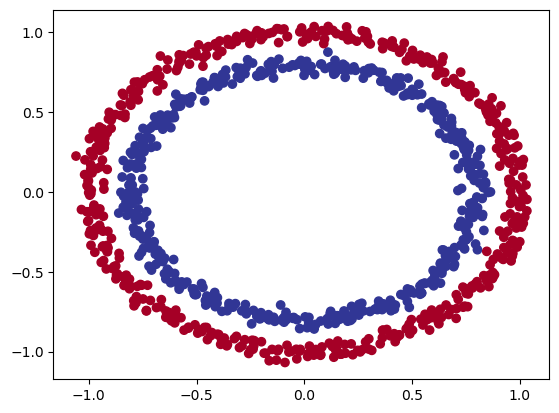

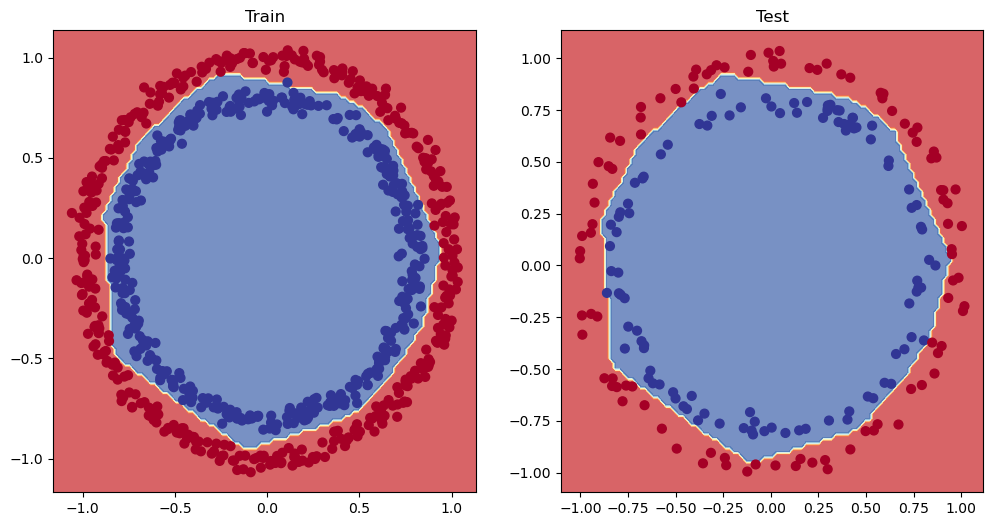

In [213]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42)
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
# print(circles.head(10))

import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y,
            cmap=plt.cm.RdYlBu
           )
X.shape, y.shape
X_sample = X[0]
y_sample = y[0]

X_sample.shape, y_sample.shape
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

from sklearn.model_selection import train_test_split
                         # 0.2 = 20% for test data & 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

    # self.two_linear_layers = nn.Seauential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )

    # def forward(self, x):
    #     return self.two_linear_layers(x)

# model_0 = CircleModelv0().to(device)
# model_0

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

torch.manual_seed(42)

# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=128),
#     nn.Linear(in_features=128, out_features=1)
# ).to(device)

model_0 = CircleModelV1().to(device)

with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
# len(untrained_preds), untrained_preds.shape, untrained_preds[:10], y_test[:10]
# print(untrained_preds[:10])

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
    # model_0 = CircleModeV1().to(device)
# print(y_logits)

y_pred_probs = torch.sigmoid(y_logits)
torch.round(y_pred_probs)

y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_preds

epochs = 2000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # if epoch % 10 == 0:
    #     print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

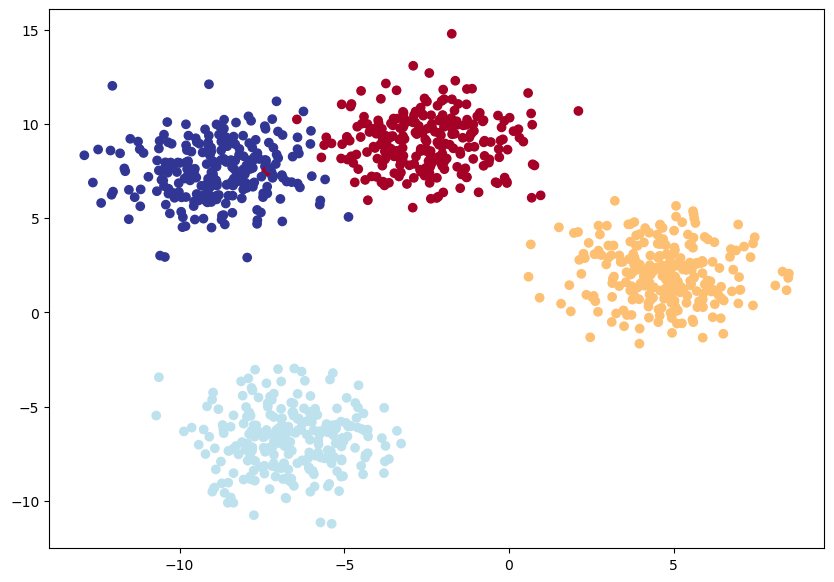

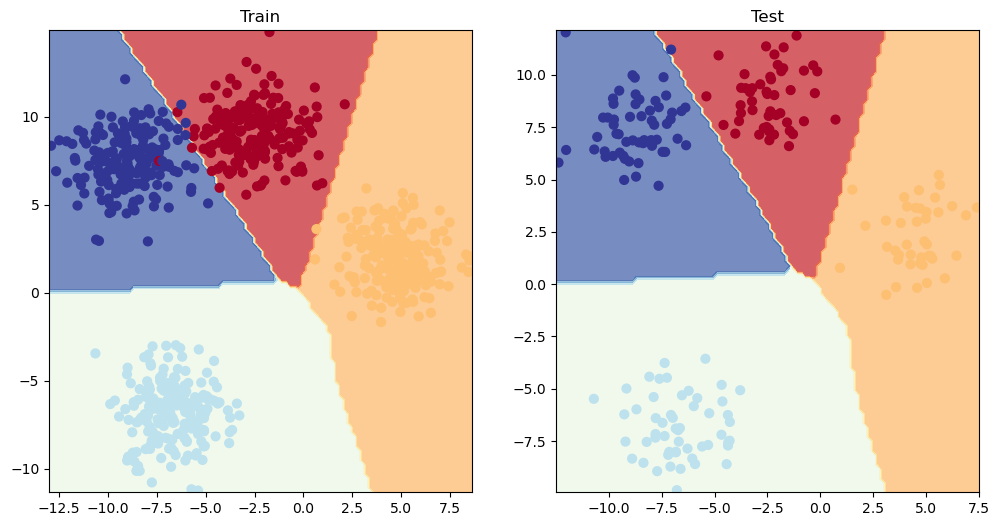

In [273]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.float32)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

torch.manual_seed(42)

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8)
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    # print(y_logits.dtype, y_blob_train.dtype)
    
    # print(y_logits, y_blob_train)

    loss = loss_fn(y_logits, y_blob_train.type(torch.int64))

    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test.type(torch.int64))
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

    # if epoch % 10 == 0:
    #     print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_pred_probs = torch.softmax(y_logits, dim=1)

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]
y_blob_test

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

